In [1721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [1722]:
# file_name_1 = 'DWL_USGS_Sites/Malletts_Creek_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Malletts_Creek_Elevation'
# var_2 = 'Gage_Height'
# site_name = 'Malletts Creek'

# file_name_1 = 'DWL_USGS_Sites/Huron_River_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Huron_River_Elevation'
# var_2 = 'Gage_Height'
# site_name = 'Huron River AA'

# file_name_1 = 'DWL_USGS_Sites/Allen_Creek_Discharge_1'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Allen_Creek_Elevation'
# var_2 = 'Gage_Height'
# site_name = 'Allen Creek'

# file_name_1 = 'DWL_USGS_Sites/Mill_Creek_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Mill_Creek_Elevation_1'
# var_2 = 'Gage_Height'
# site_name = 'Mill Creek'

file_name_1 = 'DWL_USGS_Sites/Huron_River_Hamburg_Discharge'
var_1 = 'Mean_CFS'
file_name_2 = 'DWL_USGS_Sites/Huron_River_Hamburg_Elevation'
var_2 = 'Gage_Height'
site_name = 'Huron River Hamburg'

In [1723]:
def DWL_CCDF_df(file_name, var):
    
    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    time_period_data = df

    sorted_data = time_period_data.sort_values(var, ascending=False)

    time_period_data['ranked_column_m'] = sorted_data[var].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", time_period_data['ranked_column_m'].head())

    n = len(time_period_data)

    df['P_Value'] = range(1, len(df) + 1)

    time_period_data['P_Value'] = (time_period_data['ranked_column_m'] / (n + 1)) * 100
    print(time_period_data['P_Value'])
    # df = august_data
    # return df
    return(time_period_data)

In [1724]:
def DWL_plotTimeSeries(file_name, var):

    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    # Plot the time series
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df['Datetime'], df[var], marker='o', linestyle='-')

    plt.title('Time Series Plot of ' + file_name)
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

    return plt.show()

ranked column m: 22940    2639.0
22941    2752.0
22942    2878.0
22943    2991.0
22944    3071.0
Name: ranked_column_m, dtype: float64
22940    72.619703
22941    75.729224
22942    79.196478
22943    82.305999
22944    84.507430
           ...    
26568    72.949917
26569    72.564667
26570    54.567969
26571    36.818932
26572    28.315905
Name: P_Value, Length: 3633, dtype: float64


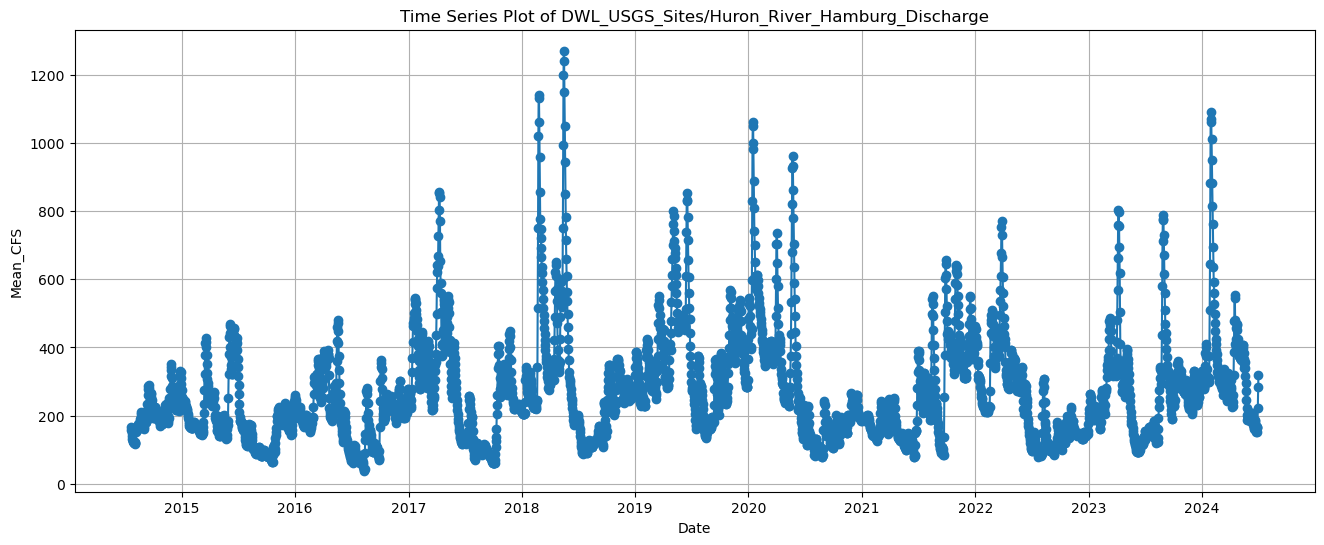

max_col_mean value is: 1270.0
ranked column m: 0    229100.0
1    229218.0
2    229083.0
3    229082.0
4    229084.0
Name: ranked_column_m, dtype: float64
0         96.876771
1         96.926668
2         96.869582
3         96.869159
4         96.870005
            ...    
236480    10.647142
236481    10.596399
236482    10.587096
236483    10.610353
236484    10.556227
Name: P_Value, Length: 236485, dtype: float64


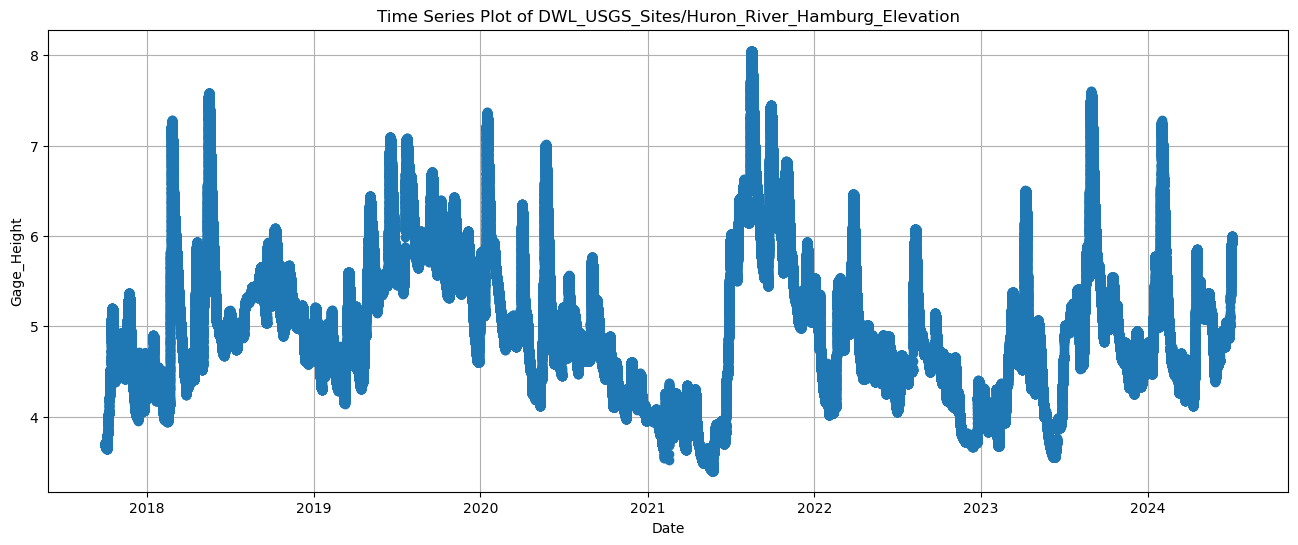

max_col_ele value is: 8.05
DataFrame 1:
      agency_cd  site_no   Datetime  71294_00060_00003  Mean_CFS Unnamed: 5  \
24107      USGS  4172000 2017-10-01                NaN      60.7          A   
24108      USGS  4172000 2017-10-02                NaN      61.2          A   
24109      USGS  4172000 2017-10-03                NaN      61.5          A   
24110      USGS  4172000 2017-10-04                NaN      60.7          A   
24111      USGS  4172000 2017-10-05                NaN      60.2          A   

       ranked_column_m  numbered_col    P_Value  
24107           3625.0          1168  99.752339  
24108           3622.0          1169  99.669785  
24109           3621.0          1170  99.642267  
24110           3624.0          1171  99.724821  
24111           3627.0          1172  99.807375  

DataFrame 2:
  agency_cd  site_no            Datetime tz_cd  Gage_Height 276705_00065_cd  \
0      USGS  4172000 2017-10-01 00:00:00   EST         3.71               A   
1      USGS  

In [1725]:
df1 = DWL_CCDF_df(file_name = file_name_1, var = var_1)
DWL_plotTimeSeries(file_name = file_name_1, var = var_1)

# these values needed for finding the range to normalize plots
max_col_mean = df1['Mean_CFS'].max()
min_col_mean = df1['Mean_CFS'].min()
range_1 = max_col_mean - min_col_mean
print("max_col_mean value is: " + str(max_col_mean))

df2 = DWL_CCDF_df(file_name = file_name_2, var = var_2)
DWL_plotTimeSeries(file_name = file_name_2, var = var_2)

# these values needed for finding the range to normalize plots
max_col_ele = df2['Gage_Height'].max()
min_col_ele = df2['Gage_Height'].min()
range_2 = max_col_ele - min_col_ele
print("max_col_ele value is: " + str(max_col_ele))

# Determine the more recent stopping date
max_date = max(df1['Datetime'].max(), df2['Datetime'].max())

# Slice dataframes to include only rows up to max_date
# df1 = df1[df1['Datetime'] <= max_date]
# df2 = df2[df2['Datetime'] <= max_date]

# Find intersection of date ranges
start_date = max(df1['Datetime'].min(), df2['Datetime'].min())
end_date = min(df1['Datetime'].max(), df2['Datetime'].max())

# Filter both dataframes to intersecting date range
df1 = df1[(df1['Datetime'] >= start_date) & (df1['Datetime'] <= end_date)]
df2 = df2[(df2['Datetime'] >= start_date) & (df2['Datetime'] <= end_date)]

print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
print(df2.head())

print("DataFrame 1:")
print(df1.tail())
print("\nDataFrame 2:")
print(df2.tail())

Yeah it does, also if the elbows are before the 10% then it might also not matter as much. What would be really cool is if you could highlight in the time series for both discharge and elevation, the time steps where the discharge is at the p=10% value (plus or minus 2% so hopefully the highlight stand out better) and then on separate time series of disacharge and elevation, then times when the elevation was at that p = 10% because then if the time steps are still the same, then I’d say they’re interchangeable

In [1726]:
p_value = []

In [1727]:
def DWL_CCDF_plot_P(df, x, y, P, file_name, p_value):
    df_sorted = df.sort_values(by='P_Value')

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')

    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    if P == 12:
        p_value.append(intersection_y)

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    if y == 'Mean_CFS':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')
    
    if y == 'Gage_Height':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + .1),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter

    if y == 'Mean_CFS':
        plt.title('CCDF of DWL Site: ' + file_name + " for Mean Daily Flow with " + str(P) + " exceedance probability")
    if y == 'Gage_Height':
        plt.title('CCDF of DWL Site: ' + file_name + " for Gage Height with " + str(P) + " exceedance probability")

    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    
    if y == 'Mean_CFS':
        plt.ylabel('Mean Daily Flow (cfs)')
    if y == 'Gage_Height':
        plt.ylabel('Elevation/Gage Height (feet)')
    plt.grid(True)

In [1728]:
def DWL_CCDF_Overlay(var_1, var_2, df1, df2, x, site_name):

    df1_sorted = df1.sort_values(by='P_Value')
    df2_sorted = df2.sort_values(by='P_Value')

    fig, ax1 = plt.subplots(figsize=(16, 6))

    # df1_sorted['Normal_Mean'] = (df1_sorted[var_1] / max_col_mean)
    # df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] / max_col_ele)

    df1_sorted['Normal_Mean'] = (df1_sorted[var_1] - min_col_mean) /range_1
    df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] - min_col_ele) /range_2


    color = 'tab:red'
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)')
    ax1.set_ylabel('Mean Daily Flow (cfs)', color=color)
    ax1.plot(df1_sorted[x], df1_sorted['Normal_Mean'], marker='o', linestyle='-', color = 'red')
    ax1.tick_params(axis='y', labelcolor=color)

    # ax1.set_xlim(0, 100)
    # ax1.set_ylim(0, 1)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Elevation/Gage Height (feet)', color=color)  # we already handled the x-label with ax1
    ax2.plot(df2_sorted[x], df2_sorted['Normal_Gage_Height'], marker='o', linestyle='-') #, color = 'blue')
    ax2.tick_params(axis='y', labelcolor=color)

    # ax2.set_ylim(0, 1)

    plt.title('CCDFs of DWL Site: ' + site_name + " for Mean Daily Flow and Gage Height") 
    plt.grid(True)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


In [1729]:
def DWL_CCDF_Overlay_Normalized(var_1, var_2, df1, df2, x, site_name, max_col_mean, max_col_ele):

    df1_sorted = df1.sort_values(by='P_Value')
    df2_sorted = df2.sort_values(by='P_Value')

    fig, ax = plt.subplots(figsize=(16, 6))

    # df1_sorted['Normal_Mean'] = (df1_sorted[var_1] / max_col_mean)
    # df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] / max_col_ele)

    df1_sorted['Normal_Mean'] = (df1_sorted[var_1] - min_col_mean) /range_1
    df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] - min_col_ele) /range_2
    

    # color = 'tab:red'
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)')
    ax.plot(df1_sorted[x], (df1_sorted['Normal_Mean']), marker='o', linestyle='-', color = 'red')
    # ax.tick_params(axis='y', labelcolor=color)


    # color = 'tab:blue'
    
    ax.plot(df2_sorted[x], df2_sorted['Normal_Gage_Height'], marker='o', linestyle='-') #, color = 'blue')
    # ax2.tick_params(axis='y', labelcolor=color)

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)

    plt.title('CCDFs of DWL Site: ' + site_name + " for Mean Daily Flow and Gage Height") 
    plt.grid(True)
    # fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


    # fig, ax = plt.subplots(figsize=(10, 6))
    # ax.plot(df['Date'], df['Value'], marker='o', linestyle='-')

    # df2 = removeErroneousData("001B")
    # ax.plot(df2['Date'], df2['Value'], marker='o', linestyle='-', color = 'orange')

    # plt.title('Time Series Plot')
    # plt.xlabel('Date')
    # plt.ylabel('Value')
    # plt.grid(True)

    # plt.show()

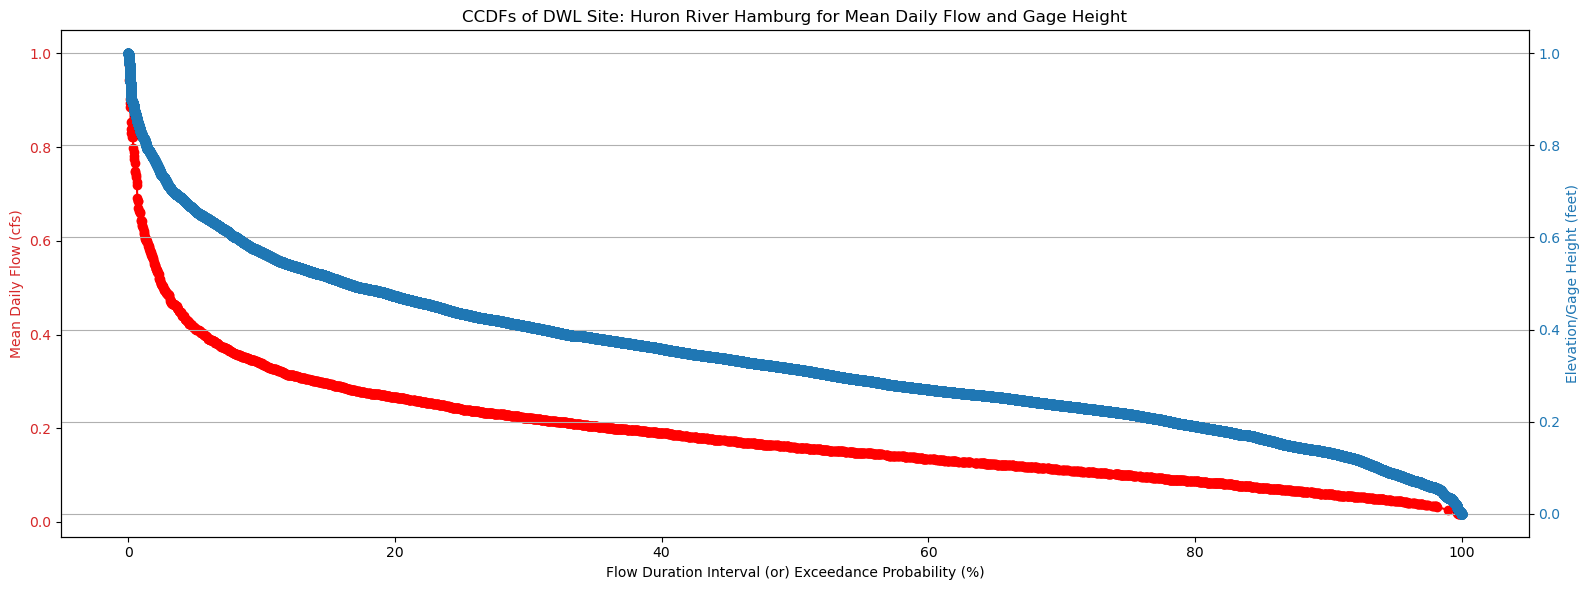

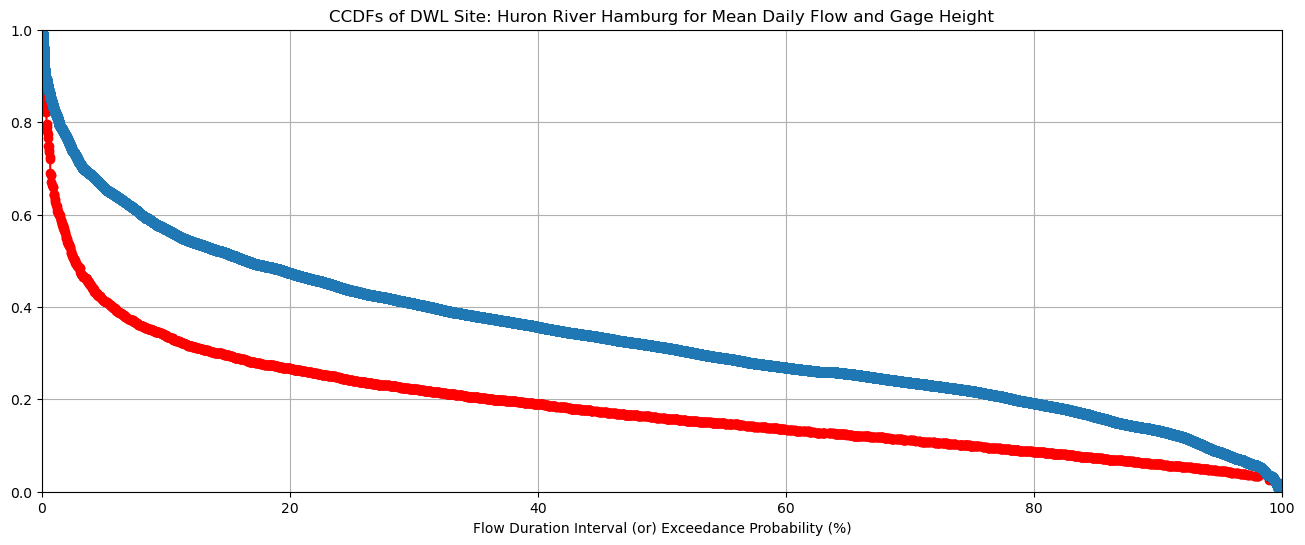

In [1730]:
DWL_CCDF_Overlay(var_1, var_2, df1, df2, x = 'P_Value', site_name = site_name)
DWL_CCDF_Overlay_Normalized(var_1, var_2, df1, df2, x = 'P_Value', site_name = site_name, max_col_mean = max_col_mean, max_col_ele = max_col_ele)

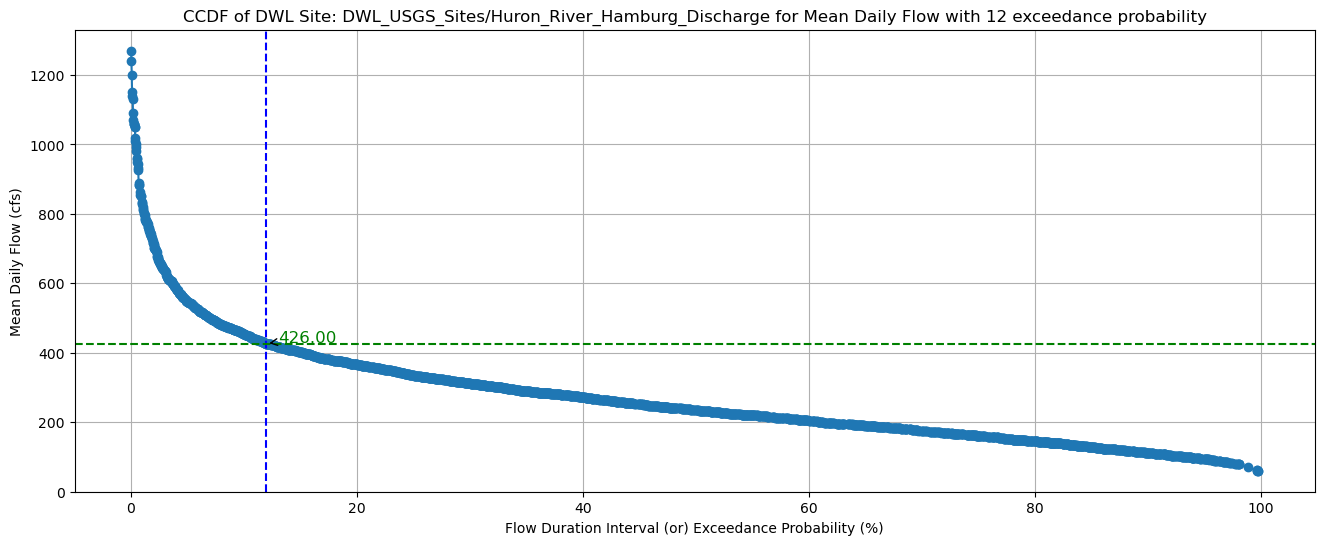

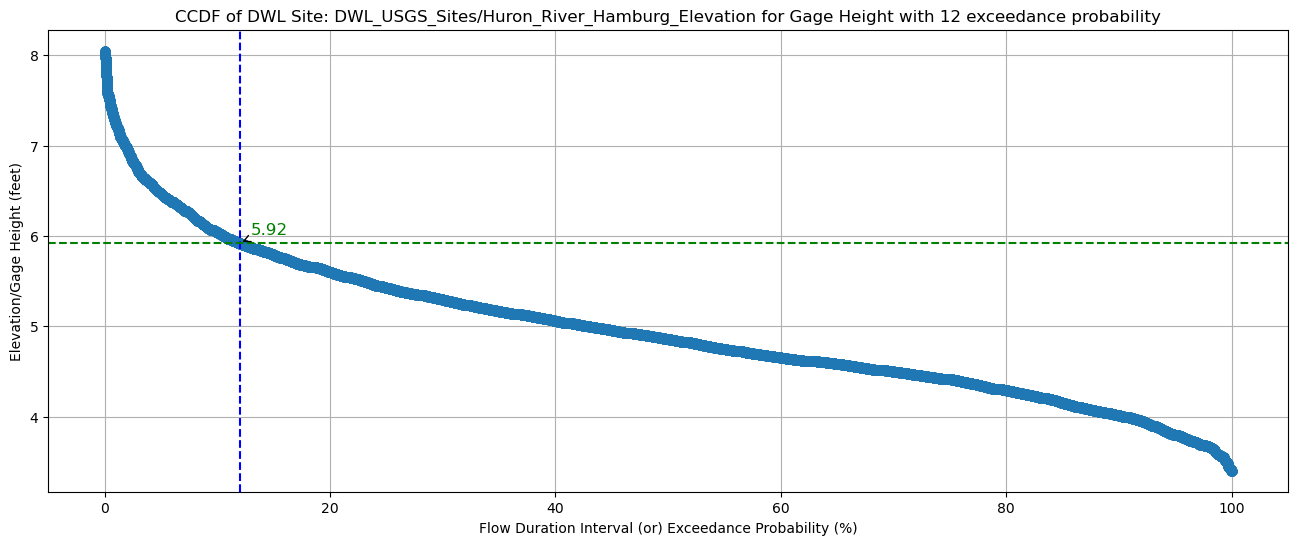

In [1731]:
# df = DWL_plotTimeSeries(file_name, var)

# MALLETS CREEK:
# D: 21.904 - 28.7
# E: 3.77 - 3.69
P = 12
DWL_CCDF_plot_P(df = df1, x='P_Value', y= var_1, P=P, file_name = file_name_1, p_value = p_value)
DWL_CCDF_plot_P(df = df2, x='P_Value', y= var_2, P=P, file_name = file_name_2, p_value = p_value)

# DWL_CCDF_plot_P(df = df2, x='P_Value', y= var_2, P=10, file_name = file_name_2, P10_value = P10_value)

In [1732]:
def DWL_plotTimeSeries_Highlighted_P10(df, file_name, var, output_csv, low, high):

    # df = pd.read_csv(file_name+".csv")
    # df['Datetime'] = pd.to_datetime(df['Datetime'])
    # df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    # Plot the time series
    fig, ax = plt.subplots(figsize=(30, 6))
    ax.plot(df['Datetime'], df[var], marker='o', linestyle='-')

    # Extract red colored points (gage height between 5 and 6)
    red_points = df[(df[var] >= low) & (df[var] <= high)].copy()
    
    # Save red points to CSV
    red_points.to_csv(output_csv, index=False)

     # Highlight points where gage height is between 5 and 6
    mask = (df[var] >= low) & (df[var] <= high)
    ax.scatter(df.loc[mask, 'Datetime'], df.loc[mask, var], color='red', label='Gage Height [5, 6]', zorder=5)

    plt.title('Time Series Plot of ' + file_name)
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

    return plt.show()

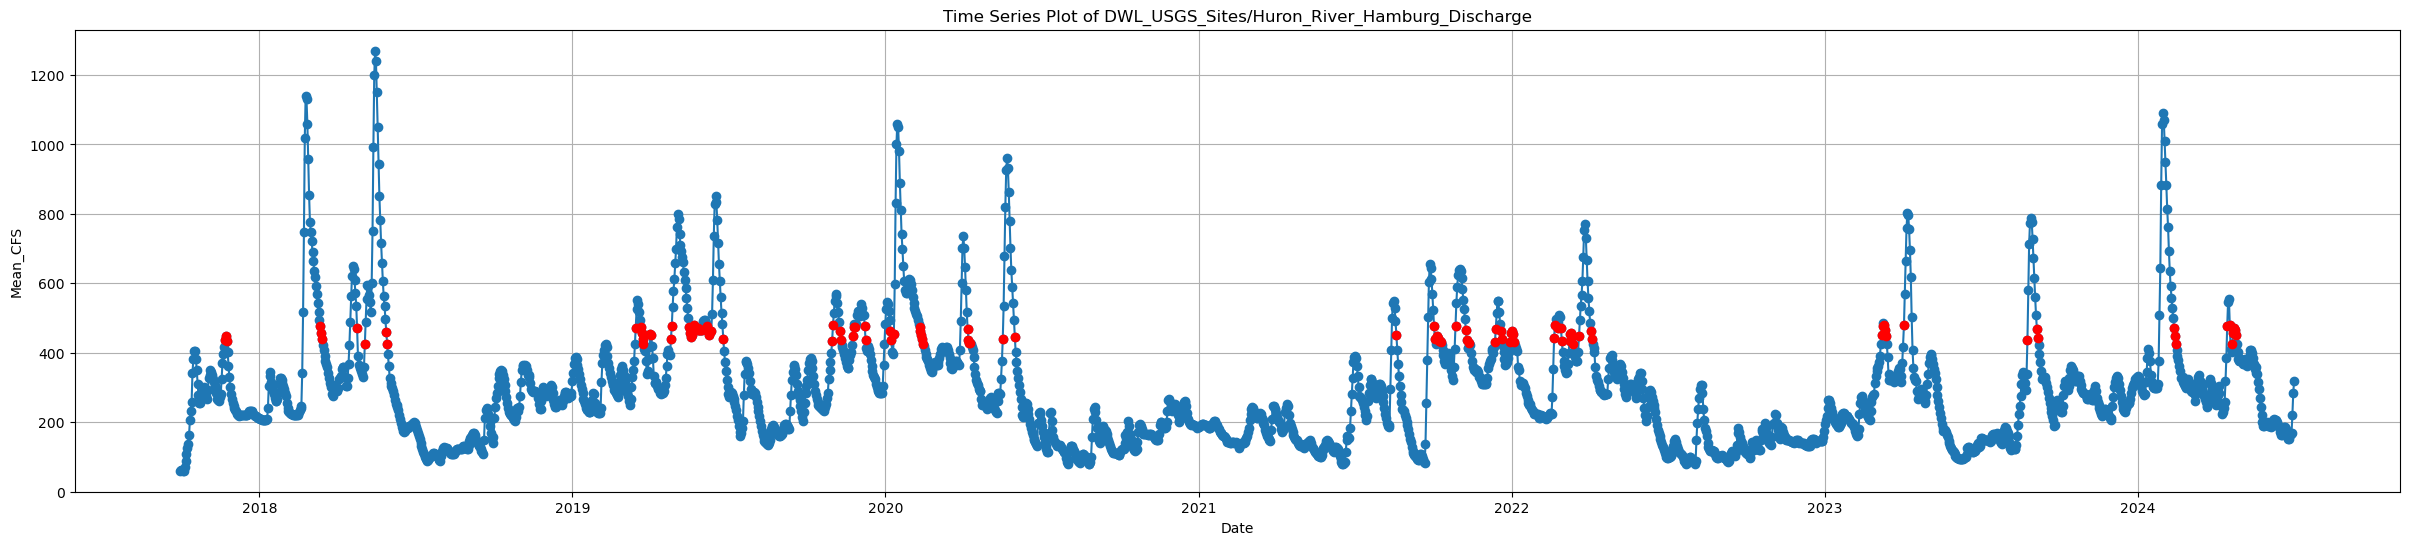

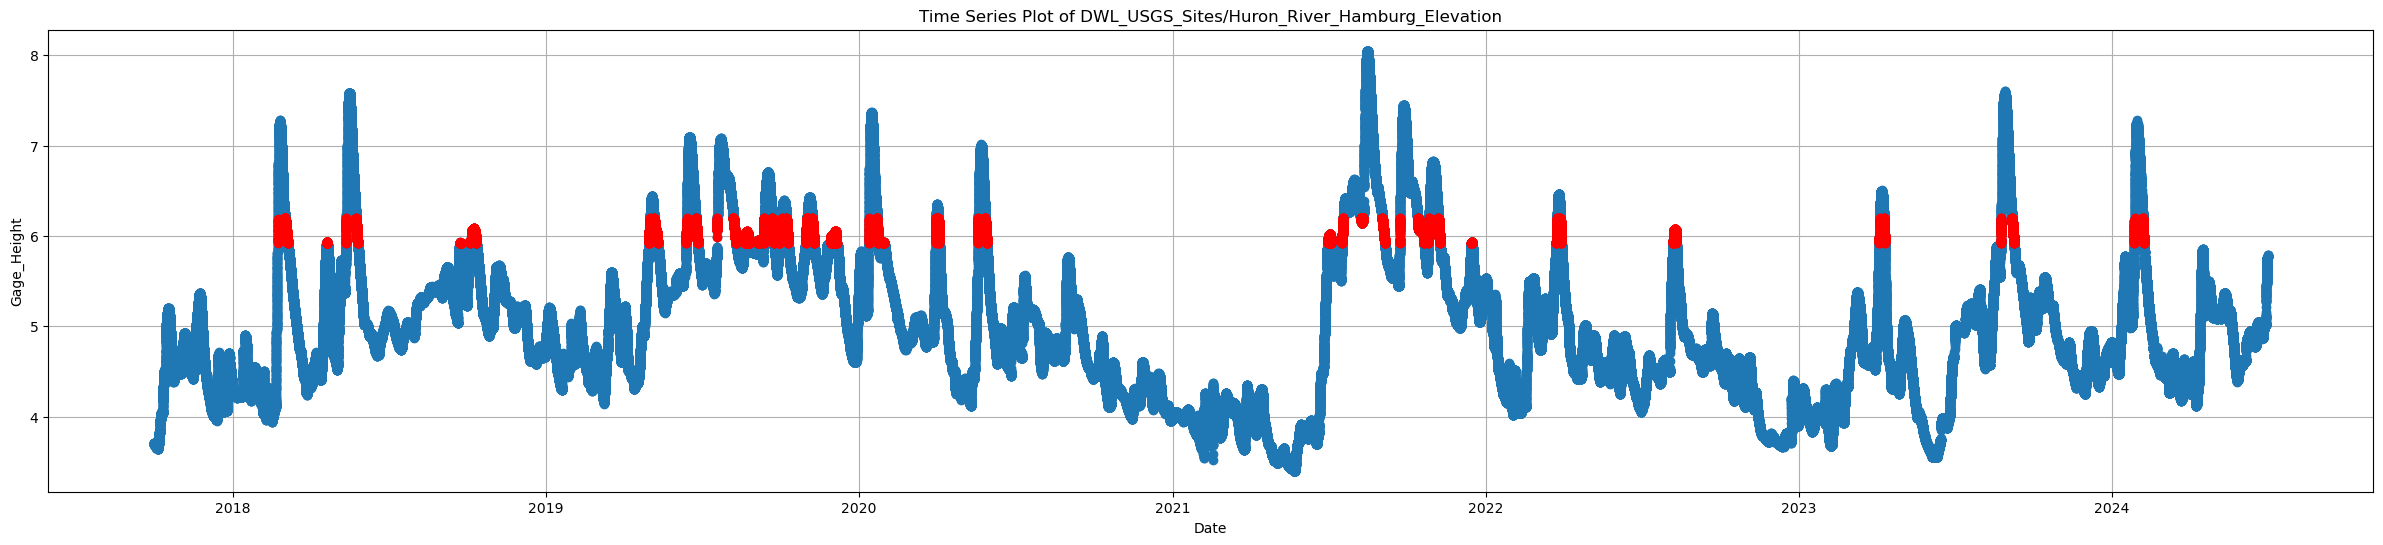

In [1733]:
DWL_plotTimeSeries_Highlighted_P10(df = df1, file_name = file_name_1, var = var_1, output_csv='red_points.csv', low=426, high=481)
DWL_plotTimeSeries_Highlighted_P10(df = df2, file_name = file_name_2, var = var_2, output_csv='red_points.csv', low=5.92, high=6.2)